In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_1.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.75
part_sd = 0.25

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

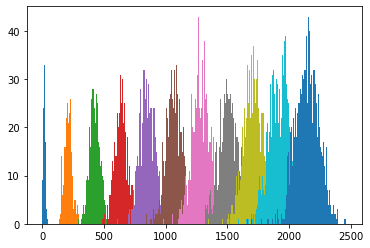

In [3]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [4]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [5]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 16.582847072120494 +- 0.35572846139429504
sigma = 9.19627606811057 +- 0.3176320666503193
nevents = 460.4534438083685 +- 15.665636459917078


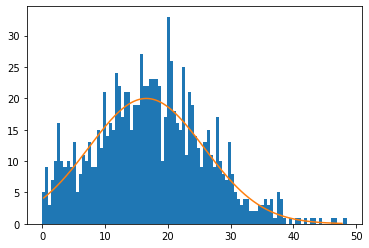

In [7]:
proc_calibration(0, 100, [15, 10, 10000])

mu = 211.5115640162372 +- 1.076998410322371
sigma = 30.783853917579155 +- 0.9014683462305265
nevents = 1721.7684834846261 +- 58.19245566634645


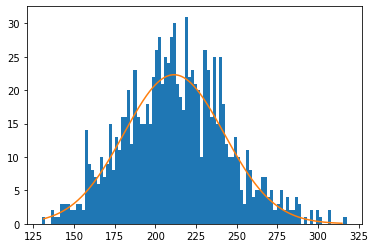

In [9]:
proc_calibration(1, 100, [200, 50, 10000])

mu = 425.3437815741072 +- 1.2730584903168751
sigma = 41.52154532910996 +- 1.0351567118764282
nevents = 2428.905160749609 +- 71.70129181450449


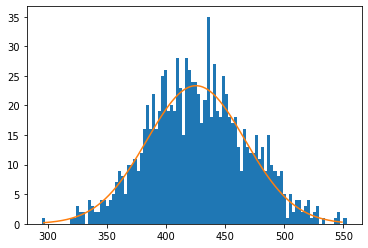

In [10]:
proc_calibration(2, 100, [500, 100, 10000])

mu = 641.4708247701441 +- 1.7170663950881788
sigma = 48.263218676155724 +- 1.392441628855607
nevents = 3089.229025487053 +- 106.51639165759563


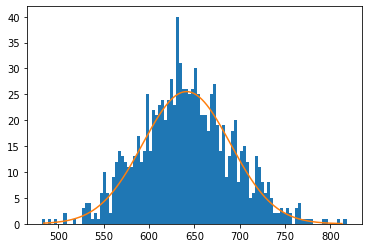

In [12]:
proc_calibration(3, 100, [650, 100, 10000])

mu = 853.9391584797445 +- 1.9011626477824797
sigma = 63.17321122879486 +- 1.6014333262021898
nevents = 4273.6956596301825 +- 122.75618759446785


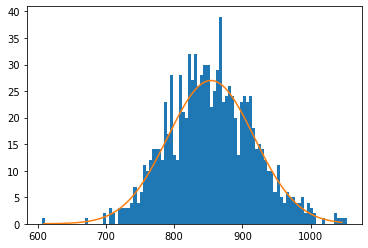

In [14]:
proc_calibration(4, 100, [850, 100, 10000])

mu = 1071.3109382256682 +- 2.1118751372613387
sigma = 59.20260188426358 +- 1.685185182606369
nevents = 3943.2337107825806 +- 137.54351499329778


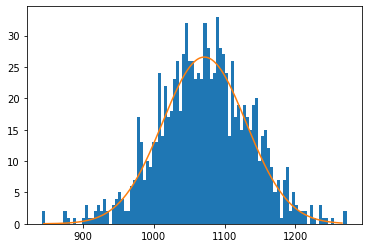

In [16]:
proc_calibration(5, 100, [1100, 100, 10000])

mu = 1286.2451797465162 +- 2.3912364492092597
sigma = 67.948262734637 +- 1.854469225915233
nevents = 4907.50124457231 +- 168.7013178605552


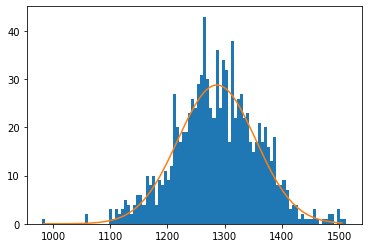

In [17]:
proc_calibration(6, 100, [1200, 100, 10000])

mu = 1507.4702965291526 +- 2.47642829228528
sigma = 73.90958463460468 +- 2.04363982089298
nevents = 4581.684275725385 +- 148.8458068812897


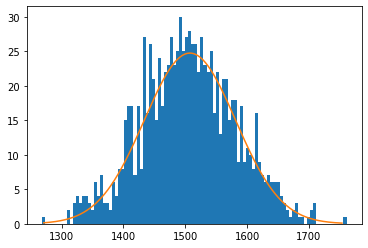

In [18]:
proc_calibration(7, 100, [1400, 100, 10000])

mu = 1717.0326637160429 +- 2.5422258205634805
sigma = 81.53690464343254 +- 2.1058529649055426
nevents = 5931.797051132954 +- 178.3068198300704


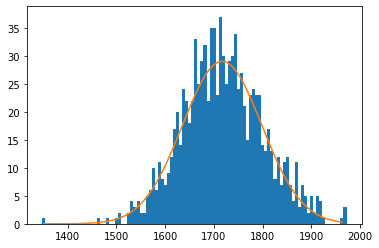

In [20]:
proc_calibration(8, 100, [1700, 100, 10000])

mu = 1928.2125183636404 +- 3.2536102808151
sigma = 90.46075471463382 +- 2.6154916384753286
nevents = 6456.242717346874 +- 223.39962027445517


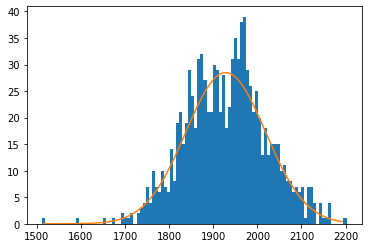

In [22]:
proc_calibration(9, 100, [2000, 100, 10000])

mu = 2150.4947249542747 +- 3.0968646996471056
sigma = 87.90571418238294 +- 2.3162530551585934
nevents = 7503.745677247893 +- 257.50107975529437


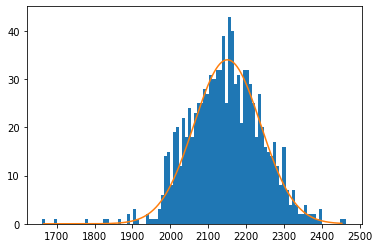

In [24]:
proc_calibration(10, 100, [2200, 100, 10000])

In [25]:
energy_mean= [mus[en] for en in energy]
energy_std = [delta_mus[en] for en in energy]

a = 0.21532266599709152 +- 0.00015409486541000195
b = -4.896620170912696 +- 0.3575680734985923


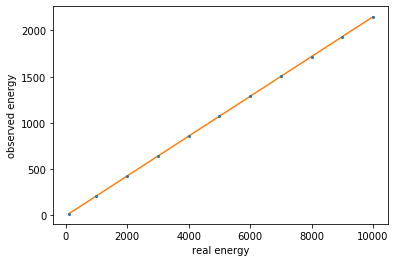

In [26]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [27]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [28]:
f = open("reduction_1.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [29]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [30]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 512.6698651600933 +- 3.154817685598187
sigma = 95.32501869714845 +- 2.342398597145713
nevents = 12838.519309935906 +- 418.00370814391215
mean = 510.31868257843763
std = 98.81131822451074




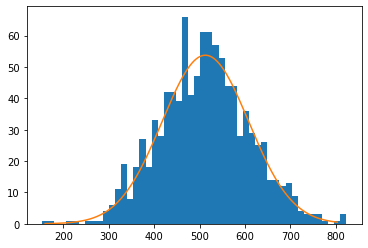

In [31]:
proc(0, 50, [500, 150, 10000])

mu = 1505.6119840375768 +- 5.271868490860409
sigma = 169.0178253210628 +- 4.138269443778847
nevents = 21225.92750563341 +- 648.2979267393588
mean = 1506.344432941834
std = 173.13721778187718




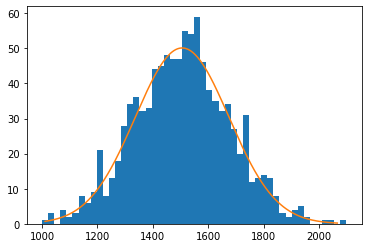

In [32]:
proc(1, 50, [1500, 200, 100000])

mu = 2506.12926407943 +- 7.029542142063344
sigma = 219.42992587783513 +- 5.631391208771078
nevents = 34973.86683905684 +- 1088.5982905604994
mean = 2510.69167297146
std = 225.50905989737




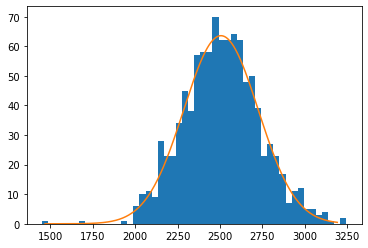

In [33]:
proc(2, 50, [2500, 300, 100000])

mu = 3497.287008573613 +- 6.829296638268502
sigma = 257.01469051735705 +- 4.992846793823521
nevents = 39960.18689266403 +- 1040.6211943419892
mean = 3494.515883065819
std = 261.50659430493533




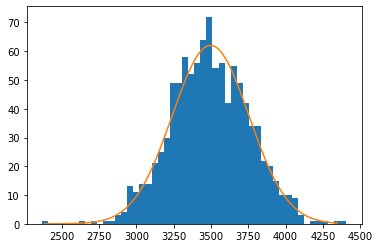

In [34]:
proc(3, 50, [3500, 400, 100000])

mu = 4509.715938418329 +- 9.116891354458772
sigma = 281.9836068769748 +- 6.754799286573
nevents = 34286.79579730787 +- 1088.5378350107487
mean = 4515.219057217345
std = 296.50607166005955




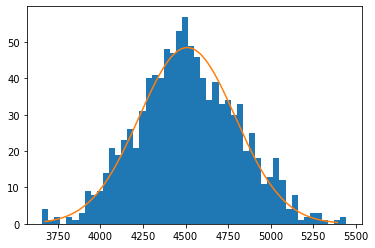

In [35]:
proc(4, 50, [4500, 500, 100000])

mu = 5515.033091178318 +- 12.220410258717857
sigma = 331.4984703411352 +- 9.587674063311841
nevents = 41902.338046725265 +- 1494.3436472172373
mean = 5517.686064350331
std = 327.5398987335424




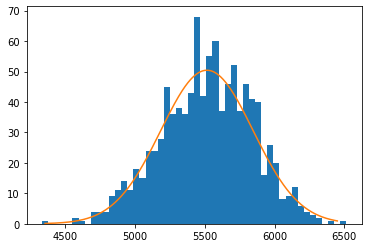

In [36]:
proc(5, 50, [5500, 500, 100000])

mu = 6489.149433884127 +- 11.644478870214186
sigma = 336.19567420433725 +- 9.008736235867996
nevents = 66367.85591524935 +- 2278.381437927441
mean = 6483.230490002241
std = 364.3095487739794




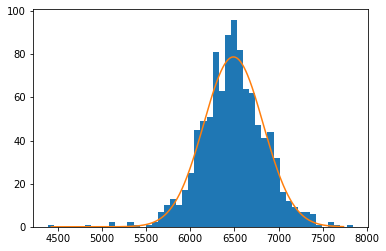

In [37]:
proc(6, 50, [6500, 500, 100000])

mu = 7506.988972051077 +- 13.432365683767872
sigma = 372.21091342225236 +- 9.96968130904507
nevents = 49468.39454474927 +- 1760.4069894147872
mean = 7505.704881402235
std = 396.5051972447031




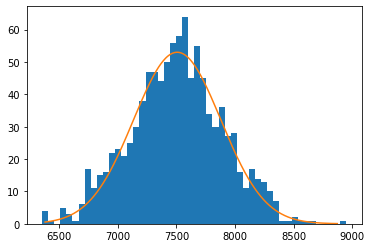

In [38]:
proc(7, 50, [7500, 600, 100000])

mu = 8481.992059778036 +- 11.191682393249604
sigma = 406.75176537418037 +- 8.529374003603019
nevents = 59735.25868998369 +- 1621.9167111932234
mean = 8482.427536010462
std = 413.20869889541194




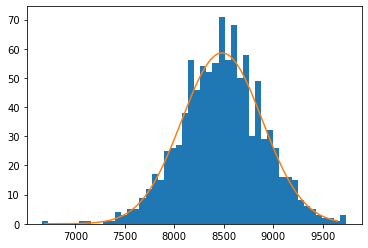

In [39]:
proc(8, 50, [8500, 500, 1000000])

mu = 9501.959962759332 +- 16.120371525565137
sigma = 440.5289663544278 +- 11.966414749715723
nevents = 83706.06747812171 +- 2994.5471185367
mean = 9495.059427828786
std = 453.7411530931327




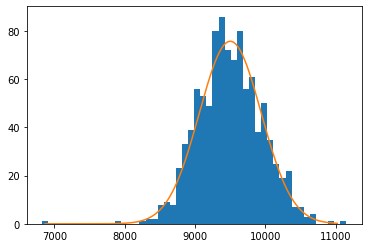

In [40]:
proc(9, 50, [9500, 700, 1000000])

In [41]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.0012103229585586498 +- 0.001479170494060679
b = 4.2573489502353175 +- 0.10309305513855747


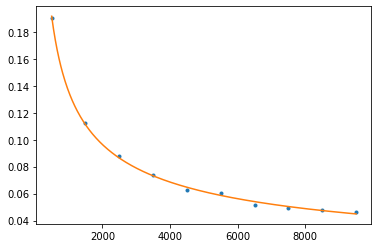

In [42]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [43]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()